In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import os

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback, EarlyStopping

%matplotlib inline

In [104]:
Q2_cut = 100

In [105]:
def split_trval(x_data, y_data, perc = 0.3):
    size_val = round(x_data.shape[0]*perc)
    if size_val > 0:
        idx = np.random.choice(np.arange(1, x_data.shape[0]-1, 2), size_val, replace=False)
        x_val = x_data[idx]
        y_val = y_data[idx]
        x_tr = np.delete(x_data, idx, axis = 0)
        y_tr = np.delete(y_data, idx)
    else:
        x_tr = x_data
        y_tr = y_data
        x_val = None
        y_val = None
    return x_tr, y_tr, x_val, y_val, size_val

In [152]:
# Load data
filenames = os.listdir("./data")
filenames = ["DATA_CHORUS_0.02.yaml", "DATA_CHORUS_0.045.yaml"]

for i, filename in enumerate(filenames):
    with open("./data/" + filename, "r") as file:
        input_data = yaml.safe_load(file)
    
    x = input_data["x"]
    Q2 = np.array(input_data["Q2"])
    F_2 = np.array(input_data["F_2"])
    
    Q2_mask = np.where(Q2<Q2_cut)
    Q2 = Q2[Q2_mask]
    F_2 = F_2[Q2_mask]
    
    if i == 0:
        x_data = np.zeros((len(Q2), 2))
        x_data[:, 0] = x
        x_data[:, 1] = Q2 
        y_data = F_2
        x_tr, y_tr, x_val, y_val, size_val = split_trval(x_data, y_data)
    else:
        x_data = np.zeros((len(Q2), 2))
        x_data[:, 0] = x
        x_data[:, 1] = Q2 
        y_data = F_2
        x_tr_new, y_tr_new, x_val_new, y_val_new, size_val = split_trval(x_data, y_data)
        
        x_tr = np.concatenate([x_tr, x_tr_new], axis = 0)
        y_tr = np.concatenate([y_tr, y_tr_new], axis = 0)
        if size_val != 0:
            x_val = np.concatenate([x_val, x_val_new], axis = 0)
            y_val = np.concatenate([y_val, y_val_new], axis = 0)

In [153]:
# Create the NN model
model = Sequential()
model.add(Dense(units = 1, activation = 'linear', input_shape=[2]))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam", metrics=["accuracy"])

# Display the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 1,156
Trainable params: 1,156
Non-trainable params: 0
_________________________________________________________________


In [154]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
model.fit(x_tr, y_tr, validation_data=(x_val ,y_val), epochs=1000, batch_size=1, verbose=1, callbacks=[es])

Epoch 1/1000
8/8 [==============================] - 1s 80ms/step - loss: 0.9150 - accuracy: 0.0000e+00 - val_loss: 0.7473 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.4482 - accuracy: 0.0000e+00 - val_loss: 0.4971 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.4636 - accuracy: 0.0000e+00 - val_loss: 0.4004 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.3708 - accuracy: 0.0000e+00 - val_loss: 0.3997 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.3458 - accuracy: 0.0000e+00 - val_loss: 0.3897 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2889 - accuracy: 0.0000e+00 - val_loss: 0.3323 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.3264 - accuracy: 0.0000e+00 - val_l

8/8 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0076 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.0000e+00 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.006

8/8 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 112/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 113/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss:

8/8 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 220/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 221/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 222/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 223/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 224/1000
8/8 [==============================] - 0s 6ms/step - loss: 9.7702e-04 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 225/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_l

In [155]:
y_tr_pred = model.predict(x_tr)
y_val_pred = model.predict(x_val)

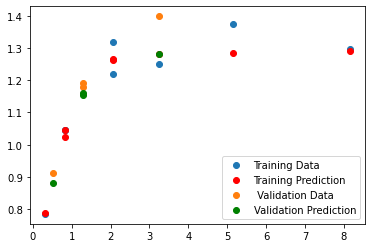

In [158]:
plt.scatter(x_tr[:,1], y_tr, label = "Training Data")
plt.scatter(x_tr[:,1], y_tr_pred, color = "red", label = "Training Prediction")
plt.scatter(x_val[:,1], y_val, label = " Validation Data")
plt.scatter(x_val[:,1], y_val_pred, color = "green", label = "Validation Prediction")
plt.legend()